In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv (r'..\datathicc.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000000 entries, 0 to 39999999
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   game                      int64  
 1   player                    object 
 2   hand                      object 
 3   individual books counted  int64  
 4   team books counted        int64  
 5   total books counted       int64  
 6   value                     int64  
 7   nil chance                int64  
 8   average face value        float64
 9   misdeal                   bool   
 10  nil                       bool   
dtypes: bool(2), float64(1), int64(6), object(2)
memory usage: 2.8+ GB


In [21]:
df.head()

,game,player,hand,individual books counted,team books counted,total books counted,value,nil chance,average face value,misdeal,nil
0,0,north,LS AS TS 4S AH 8H 5H KC 8C TD 9D 8D 5D,5,7,13,16,0,9.54,False,False
1,0,east,BS 8S 6S 3S KH QH JH TH 7H TC 7C 6C JD,2,6,13,9,0,9.31,False,False
2,0,south,DS KS 4H 3H 9C 5C 4C 3C 2C QD 7D 6D 3D,2,7,13,3,1,6.62,False,True
3,0,west,QS JS 9S 7S 5S 9H 6H AC QC JC AD KD 4D,4,6,13,15,0,9.77,False,False
4,1,north,AS JS 9S 6S 5S JH 6H 6C KD QD 8D 6D 5D,2,4,11,7,1,8.62,False,True


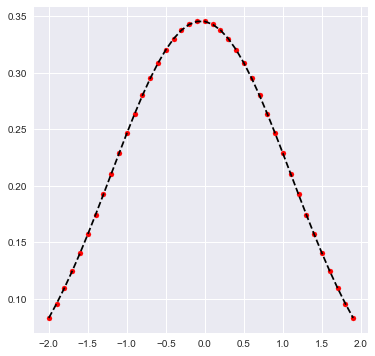

In [25]:
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
    
# To generate an array of x-values
#x = df['individual books counted'].head(10000)
x = np.arange(-2, 2, 0.1)

# To generate an array of
# y-values using corresponding x-values
y = pdf(x)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')
  
plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
plt.show()

<AxesSubplot:>

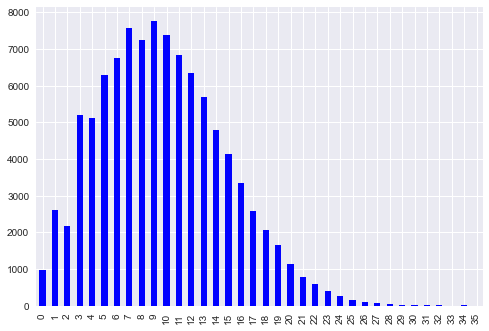

In [30]:
sample = 100000
data = np.array(df['individual books counted'].head(sample))

freq = pd.DataFrame(data)[0].value_counts()
sort_freq = freq.sort_index()
sort_freq.plot(kind='bar', color='blue')
relative_freq = sort_freq / sample
relative_freq.plot(kind='bar', color='blue')

C:\Users\home\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0', ylabel='Density'>

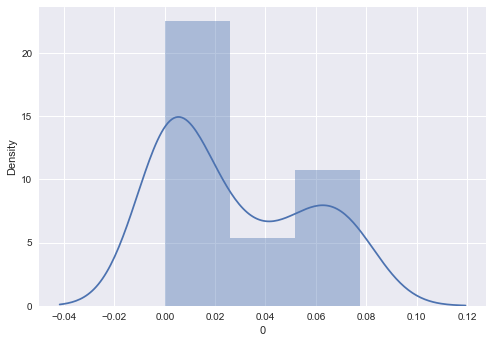

In [33]:
sample = 100000
data = np.array(df['value'].head(sample))

freq = pd.DataFrame(data)[0].value_counts()
sort_freq = freq.sort_index()
sort_freq.plot(kind='bar', color='blue')
relative_freq = sort_freq / sample
relative_freq.plot(kind='bar', color='blue')